In [1]:
# Setup the library
import os
top_level=f'{os.getcwd()}/..'
import time
import math
import pyrogue as pr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a Virtual Client to connect to the Virtual Server via Zeromq
client = pr.interfaces.VirtualClient(addr='localhost', port=9099)

Connected to Root at localhost:9099


In [3]:
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
print(client.Root.RFSoC.AxiSocCore.AxiVersion.PrintStatus())
print ( '###################################################')

###################################################
#             Firmware Version                    #
###################################################
Path         = Root.RFSoC.AxiSocCore.AxiVersion
FwVersion    = 0x2010100
UpTime       = 1 day, 3:18:31
GitHash      = dirty (uncommitted code)
XilinxDnaId  = 0x4002000001602b051ca0e045
FwTarget     = SimpleRfSoc4x2Example
BuildEnv     = Vivado v2024.2
BuildServer  = rdsrv403 (Ubuntu 22.04.5 LTS)
BuildDate    = Wed Apr 16 09:32:43 AM PDT 2025
Builder      = ruckman
###################################################


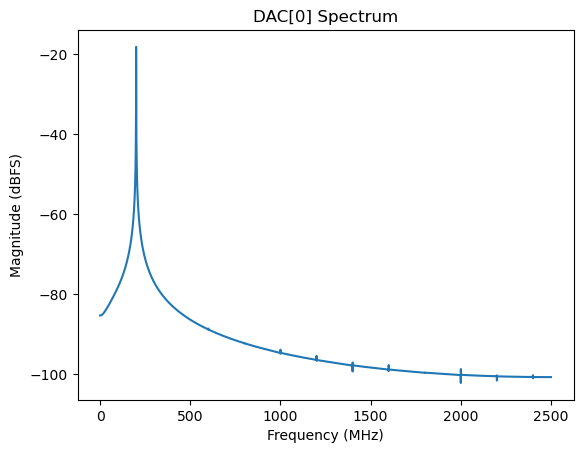

In [4]:
# Enable the processing of DAC waveforms on the PS CPU
FrameCount = client.Root.DacProcessor[0].FrameCount.get()
client.Root.DacProcessor[0].RxEnable.set(True)
while( (FrameCount+5) > client.Root.DacProcessor[0].FrameCount.get() ): time.sleep(0.1)
client.Root.DacProcessor[0].RxEnable.set(False)

# Plot the FFT
plt.title("DAC[0] Spectrum") 
plt.xlabel("Frequency (MHz)") 
plt.ylabel("Magnitude (dBFS)") 
plt.plot(client.Root.DacProcessor[0].Freq.value(), client.Root.DacProcessor[0].Magnitude.value())

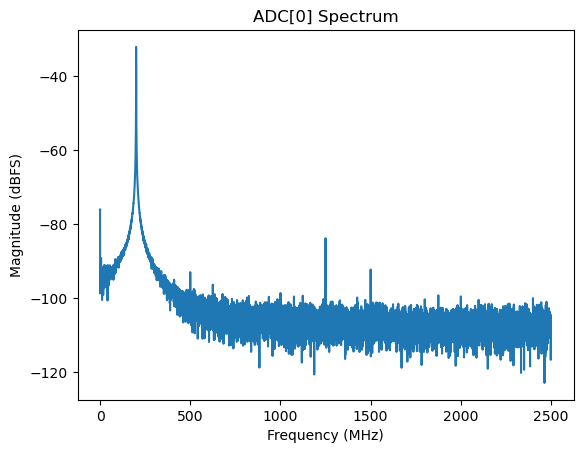

In [5]:
# Enable the processing of ADC waveforms on the PS CPU
FrameCount = client.Root.AdcProcessor[0].FrameCount.get()
client.Root.AdcProcessor[0].RxEnable.set(True)
while( (FrameCount+5) > client.Root.AdcProcessor[0].FrameCount.get() ): time.sleep(0.1)
client.Root.AdcProcessor[0].RxEnable.set(False)

# Plot the FFT
plt.title("ADC[0] Spectrum") 
plt.xlabel("Frequency (MHz)") 
plt.ylabel("Magnitude (dBFS)") 
plt.plot(client.Root.AdcProcessor[0].Freq.value(), client.Root.AdcProcessor[0].Magnitude.value())